# Roadmap: From Hamiltonian Construction to Master Eq Solver

In [2]:
import qutip as q
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

# General commands

## Quantum object
### ket and bra

In [54]:
psi0 = q.basis(2,0)
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [55]:
psi1 = q.basis(2,1)
psi1.dag()

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[0. 1.]]

In [56]:
## product
psi0.dag() * psi1

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[0.]]

In [59]:
psi1 * psi0.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 0.]
 [1. 0.]]

In [62]:
psi0 = q.basis(10,1)
psi0

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [63]:
psi0 = q.coherent(10, 2, offset=0, method=None)
psi0

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.13533468]
 [0.27067598]
 [0.38275331]
 [0.44215515]
 [0.4414275 ]
 [0.39717038]
 [0.31781378]
 [0.25575028]
 [0.14827955]
 [0.15941954]]

In [66]:
q.Qobj(psi0.full())

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[0.13533468]
 [0.27067598]
 [0.38275331]
 [0.44215515]
 [0.4414275 ]
 [0.39717038]
 [0.31781378]
 [0.25575028]
 [0.14827955]
 [0.15941954]]

[[0.13533468+0.j]
 [0.27067598+0.j]
 [0.38275331+0.j]
 [0.44215515+0.j]
 [0.4414275 +0.j]
 [0.39717038+0.j]
 [0.31781378+0.j]
 [0.25575028+0.j]
 [0.14827955+0.j]
 [0.15941954+0.j]]


<BarContainer object of 10 artists>

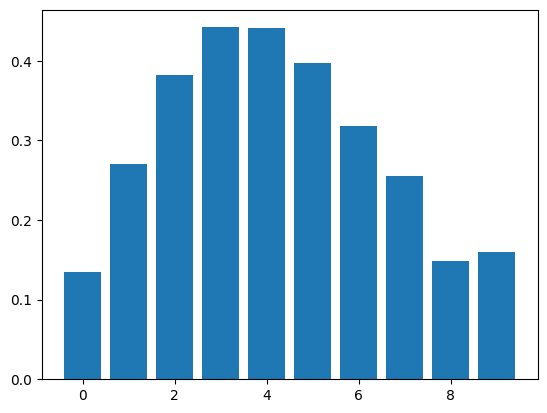

In [64]:
# Qobj to array
print(psi0.full())
plt.bar(np.arange(10), psi0.full()[:,0])

### Operators

In [69]:
### For qubit
I = q.qeye(4)
I

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

In [70]:
q.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [71]:
-q.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]

In [72]:
(-q.sigmaz()).full()

array([[-1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j]])

In [73]:
q.Qobj(np.array([[-1,0],[0,1]]))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.  0.]
 [ 0.  1.]]

In [74]:
H = 0.5 * q.sigmax() - 0.5 * q.sigmaz()
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.5  0.5]
 [ 0.5  0.5]]

In [76]:
H.eigenstates()

(array([-0.70710678,  0.70710678]),
 array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[ 0.92387953]
         [-0.38268343]]                                              ,
        Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
        Qobj data =
        [[0.38268343]
         [0.92387953]]                                               ],
       dtype=object))

In [77]:
## Diagonalization
### Eigenenergies
H.eigenstates()[0]

array([-0.70710678,  0.70710678])

In [80]:
### Eigenstates
H.eigenstates()[1][1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.38268343]
 [0.92387953]]

In [16]:
H.eigenstates()[1][1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.38268343]
 [0.92387953]]

In [81]:
### For cavities
N_trunc = 10
a = q.destroy(N_trunc)
a

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         2.82842712 0.        ]
 [0.         0.         0.         0.    

In [82]:
a.dag()

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = False
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         2.44948974
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.64575131 0.         0.         0.        ]
 [0.         0.         0.         0.    

In [83]:
a.dag() * a

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]]

In [84]:
q.num(N_trunc)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]]

In [89]:
H0 = 5 * a.dag() * a
Hd = 4 * (a+a.dag())
H = H0 + Hd
H.eigenstates()[0]

array([-3.19999992,  1.8000093 ,  6.80042345, 11.80922875, 16.90022485,
       22.36200926, 28.6686969 , 36.24970061, 45.61136414, 57.99834266])

In [90]:
H.eigenstates()[1][0]

Quantum object: dims = [[10], [1]], shape = (10, 1), type = ket
Qobj data =
[[ 7.26149069e-01]
 [-5.80919241e-01]
 [ 3.28617527e-01]
 [-1.51781901e-01]
 [ 6.07126966e-02]
 [-2.17210916e-02]
 [ 7.09371351e-03]
 [-2.14390179e-03]
 [ 6.03183369e-04]
 [-1.50170133e-04]]

Text(0.5, 1.0, 'displaced')

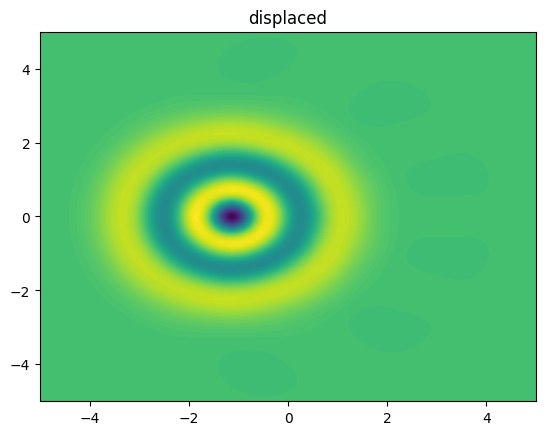

In [93]:
xvec = np.linspace(-5,5,200)
Wigner = q.wigner(H.eigenstates()[1][3], xvec, xvec)
plt.contourf(xvec, xvec, Wigner, 100)
plt.title('displaced')

Text(0.5, 1.0, 'no displacement')

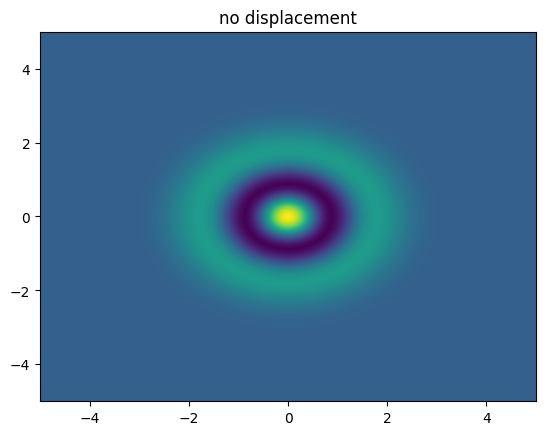

In [94]:
H0 = 5 * a.dag() * a
Hd = 0 * (a+a.dag())
H = H0 + Hd
xvec = np.linspace(-5,5,200)
Wigner = q.wigner(H.eigenstates()[1][2], xvec, xvec)
plt.contourf(xvec, xvec, Wigner, 100)
plt.title('no displacement')

## Jaynes-Cummings Model

In [99]:
## Tensor product
### Construct operators under tensor product
#### Identities
N_trunc = 10
I2 = q.qeye(2)
Ir = q.qeye(N_trunc)
#### qubit
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()
### cavity
a = q.destroy(N_trunc)
a = q.tensor(I2, a)


#### Hamiltonian construction
wc = 5 # cavity freq, in GHz
wq = 4 # qubit freq, in GHz
g = 0.1 # coupling strength

H_JC = wq * sz/2 # 1/2 is important here
H_JC += wc * a.dag() * a
H_JC += g * (a.dag()*sm + a * sp)

esys = H_JC.eigenstates()

In [100]:
esys[0] - min(esys[0])
## ground energy subtracted

array([ 0.        ,  3.99009805,  5.00990195,  8.98038476, 10.01961524,
       13.97084974, 15.02915026, 18.96148352, 20.03851648, 23.95227744,
       25.04772256, 28.94322356, 30.05677644, 33.93431458, 35.06568542,
       38.92554374, 40.07445626, 43.91690481, 45.08309519, 49.        ])

In [27]:
## param sweep
H_rc = wc * a.dag() * a
H_rc += g * (a.dag()*sm + a * sp)
wq_list = np.linspace(4,6,101)
eval_count = 5
spec = np.zeros((eval_count, len(wq_list)))
for k in range(len(wq_list)):
    H_JCspec = H_rc + wq_list[k] * sz/2 
    esys = H_JCspec.eigenstates()
    spec[:,k] = (esys[0] - min(esys[0]))[0:eval_count]

Text(0, 0.5, 'dressed energy (GHz)')

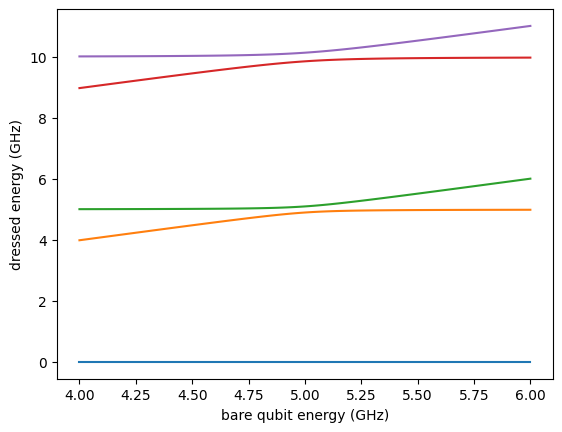

In [28]:
for j in range(5):
    plt.plot(wq_list, spec[j,:])
plt.xlabel('bare qubit energy (GHz)')
plt.ylabel('dressed energy (GHz)')

## Master eq solver

### Single qubit

In [102]:
## Essential: Hamiltonian, initialstate, time range, damping operators
## Optional: Driving, expect values, options

wq = 4
sz = -q.sigmaz()
sy = -q.sigmay()
sx = q.sigmax()
sm = q.destroy(2)
H = wq * sz / 2
c_ops = []
t_list = np.linspace(0,10,4001)
psi0 = q.basis(2, 1) + q.basis(2, 0) # superposition state
psi0 = psi0/np.sqrt(2)
result = q.mesolve(H * 2*np.pi, psi0, t_list, c_ops = c_ops)

result.states

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70710678]
  [0.70710678]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70675787+0.02221064j]
  [0.70675787-0.02221064j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70571148+0.04439936j]
  [0.70571148-0.04439936j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70396865+0.06654427j]
  [0.70396865-0.06654427j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.70153109+0.0886235j]
  [0.70153109-0.0886235j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.69840122+0.11061527j]
  [0.69840122-0.11061527j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.69458211+0.13249789j]
  [0.69458211-0.13249789j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.69007754+0.15424974j]

Text(0.5, 0, 'time (ns)')

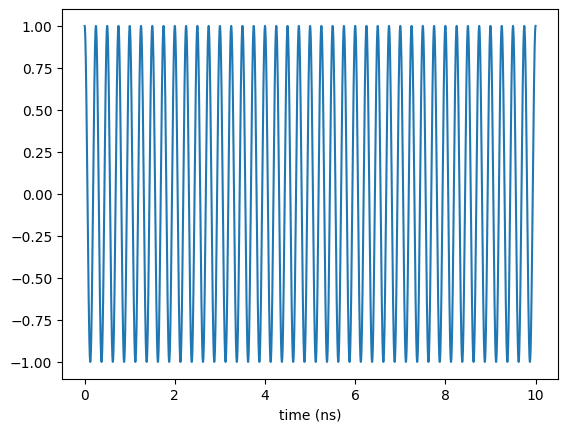

In [103]:
result = q.mesolve(H * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [sx,sz])
plt.plot(t_list, result.expect[0])
plt.xlabel('time (ns)')

Text(0.5, 0, 'time (ns)')

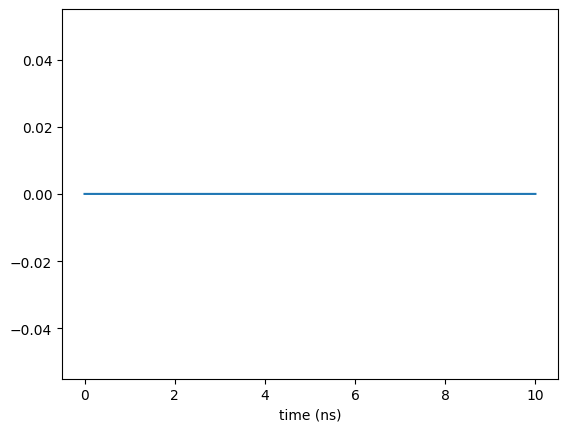

In [31]:
result = q.mesolve(H * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [sx,sz])
plt.plot(t_list, result.expect[1])
plt.xlabel('time (ns)')

In [107]:
options = q.Options(rtol=1e-10, atol=1e-10, nsteps = 1000000000, store_states = True, store_final_state = True)
result = q.mesolve(H * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [sx,sz], options = options)
result.final_state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678-3.96313557e-09j]
 [0.70710678+3.96313557e-09j]]

(-1.0, 1.0)

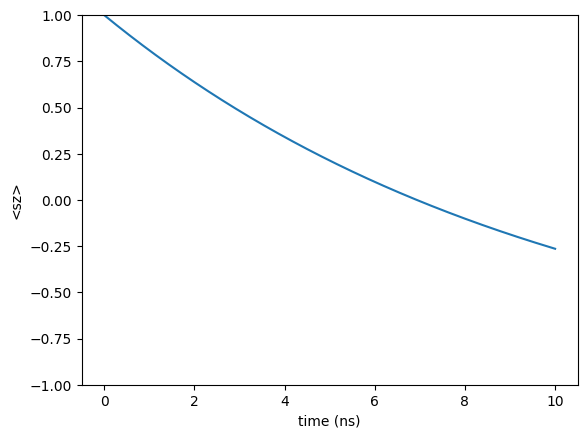

In [33]:
#### T1
c_ops = [sm*np.sqrt(1e-1)]
c_ops.append([sm.dag()*np.sqrt(1e-1)*np.exp(-4/2)])
psi0 = q.basis(2,1)
result = q.mesolve(H * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [sx,sz], options = options)
plt.plot(t_list, result.expect[1])
plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(-1,1)

(-1.0, 1.0)

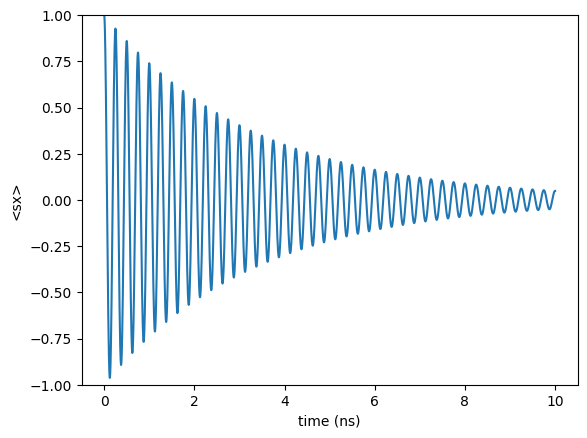

In [111]:
#### Ramsey
c_ops = [sz*np.sqrt(2e-1/2)]
c_ops.append([sm*np.sqrt(2e-1)])
c_ops.append([sm.dag()*np.sqrt(2e-1)*np.exp(-4/2)])

psi0 = q.basis(2, 1) + q.basis(2, 0) # superposition state
psi0 = psi0/np.sqrt(2)
t_list = np.linspace(0,10,4001)
result = q.mesolve(H * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [sx,sy,sz], options = options)
plt.plot(t_list, result.expect[0])
plt.xlabel('time (ns)')
plt.ylabel('<sx>')

plt.ylim(-1,1)

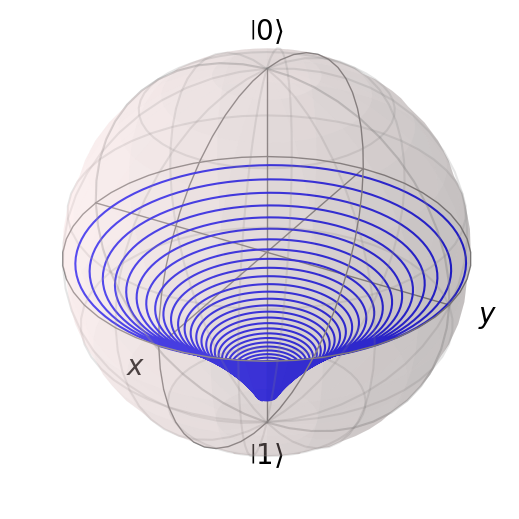

In [112]:
b = q.Bloch()
b.clear()
b.point_size = np.ones(len(t_list))


pnts = [result.expect[0], result.expect[1], result.expect[2]]
b.add_points(pnts, meth='l')
b.render()
b.show()

### Jaynes Cummings

In [129]:
## Tensor product
### Construct operators under tensor product
#### Identities
N_trunc = 10
I2 = q.qeye(2)
Ir = q.qeye(N_trunc)
#### qubit
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()
### cavity
a = q.destroy(N_trunc)
a = q.tensor(I2, a)


#### Hamiltonian construction
wc = 5 # cavity freq, in GHz
wq = 4 # qubit freq, in GHz
g = 0.1 # coupling strength

H_JC = wq * sz/2 # 1/2 is important here
H_JC += wc * a.dag() * a
H_JC += g * (a.dag()*sm + a * sp)

esys = H_JC.eigenstates()

(-1.0, 1.01)

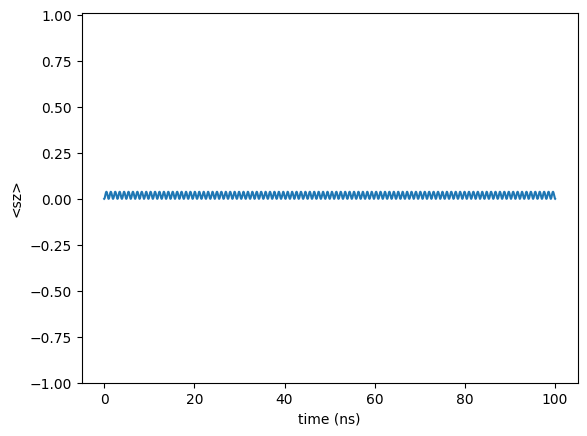

In [131]:
c_ops = [] ### No loss
psi0 = q.tensor(q.basis(2,1),q.basis(N_trunc,0)) ### Bare Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,100,4001)

result = q.mesolve(H_JC * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [a.dag()*a], options = options)
plt.plot(t_list, result.expect[0])
plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(-1,1.01)

(-1.0, 1.01)

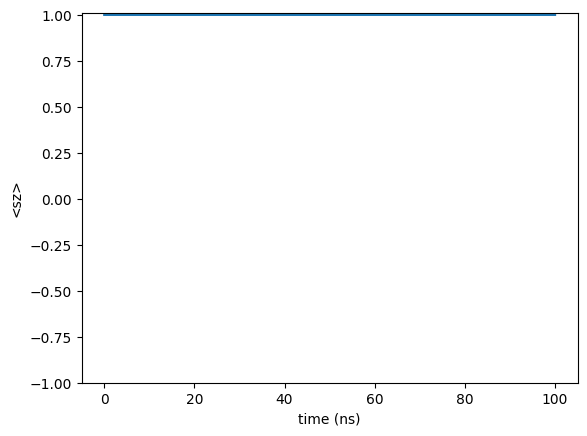

In [120]:
c_ops = [] ### No loss
psi0 = esys[1][1] ### Dressed Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,100,4001)


result = q.mesolve(H_JC * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [psi0*psi0.dag()], options = options)
plt.plot(t_list, result.expect[0], '-')
plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(-1,1.01)

(0.0, 1.0)

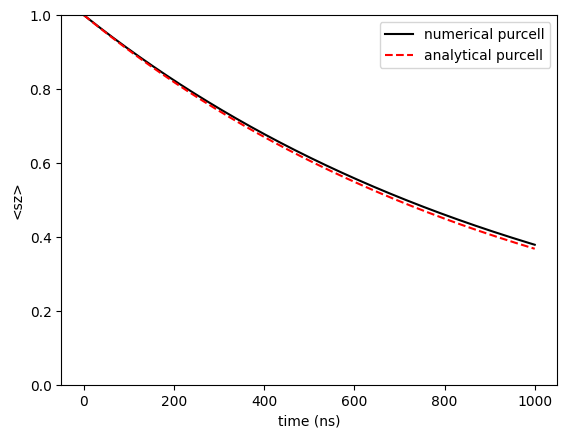

In [121]:
c_ops = [a*np.sqrt(1e-1)] ### Loss only goes into cavity
psi0 = esys[1][1] ### Dressed Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,1000,4001)

#psi0 = esys[1][0]

result = q.mesolve(H_JC * 2*np.pi, psi0, t_list, c_ops = c_ops, e_ops = [psi0*psi0.dag()], options = options)
plt.plot(t_list, result.expect[0], 'k-')
plt.plot(t_list, np.exp(-g**2/(wc-wq)**2 * 1e-1 *t_list), 'r--', alpha = 1)
plt.xlabel('time (ns)')
plt.ylabel('<sz>')
plt.legend(['numerical purcell', 'analytical purcell'])

plt.ylim(0.,1)

# Last Lecture:
 basics of qutip
 
 Jaynes-Cummings model
 
 mesolve
 
 Purcell loss

# This tutorial:
include drives in mesolve

rotating-wave approximation

steady-state solution

Example: transmission measurement

Jaynes-Cummings model
$$\hat{H} = \omega_q\hat{\sigma}_z/2 + \omega_c \hat{a}^\dagger \hat{a} + g(\hat{a} \hat{\sigma}^++ \hat{a}^\dagger\hat{\sigma}^-)$$
drive
$$\hat{H}_d(t) = d(t)\hat{\sigma}_x$$

# Drives

In [165]:
## Tensor product
### Construct operators under tensor product
#### Identities
N_trunc = 10
I2 = q.qeye(2)
Ir = q.qeye(N_trunc)
#### qubit
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()
### cavity
a = q.destroy(N_trunc)
a = q.tensor(I2, a)


#### Hamiltonian construction
wc = 5 # cavity freq, in GHz
wq = 4 # qubit freq, in GHz
g = 0.1 # coupling strength

H_JC = wq * sz/2 # 1/2 is important here
H_JC += wc * a.dag() * a
H_JC += g * (a.dag()*sm + a * sp)

esys = H_JC.eigenstates()

Text(0.5, 0, 'time (ns)')

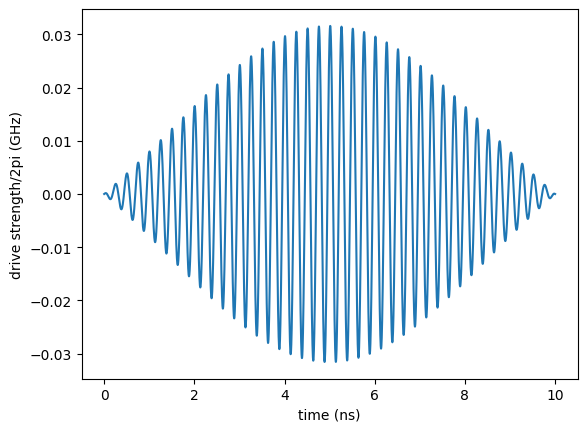

In [153]:
## Proposed drive
t_list = np.linspace(0,10,40001)
t_end = t_list[-1]
t_middle = t_end/2
drive_list = np.exp(-(t_list-t_middle)**2/(0.5*t_end)**2) 
drive_list = drive_list-np.amin(drive_list) ## Envelope
drive_list *= np.cos(2*np.pi*(esys[0][1]-esys[0][0])*t_list) * 0.05
plt.plot(t_list, drive_list)
plt.ylabel('drive strength/2pi (GHz)')
plt.xlabel('time (ns)')

In [154]:
import time

## Method 1: function-based

3.1233181953430176 s


(0.0, 1.01)

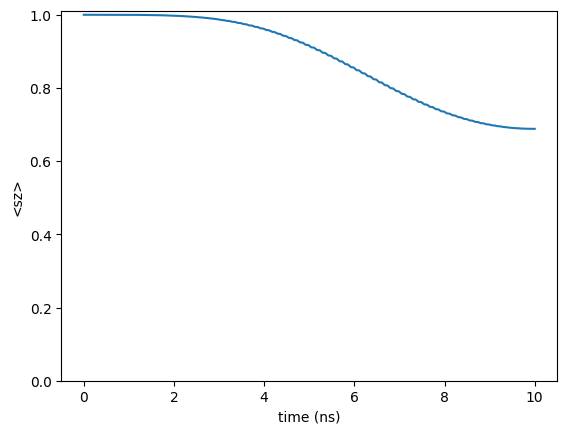

In [155]:
## Method 1: function-based

def H_coeff(t, args):
    drive = np.exp(-(t-args['t_middle'])**2/(0.5*args['t_end'])**2) 
    drive = drive- np.exp(-(0-args['t_middle'])**2/(0.5*args['t_end'])**2) ## Envelope
    drive *= np.cos(2*np.pi*(args['freq'])*t) * 0.05
    return drive

c_ops = [] ### No loss
psi0 = esys[1][1] ### Dressed Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,10,40001)
t_end = t_list[-1]
t_middle = t_end/2



H = [H_JC*2*np.pi, [sx*2*np.pi, H_coeff]]
psi0 = esys[1][0]

options = q.Options(rtol=1e-10, atol=1e-10, nsteps = 1000000000, store_states = True, store_final_state = True)
start_time = time.time()
result = q.mesolve(H, psi0, t_list, c_ops = c_ops, e_ops = [psi0*psi0.dag()], options = options, 
                   args = {'t_middle': t_middle, 't_end': t_end, 'freq':esys[0][1]-esys[0][0]})
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time, 's')
plt.plot(t_list, result.expect[0], '-')
plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(0,1.01)

## Method 2: String-based
 Cython uses C code. Some built-in C functions can be directly called

3.9373838901519775 s


(0.0, 1.01)

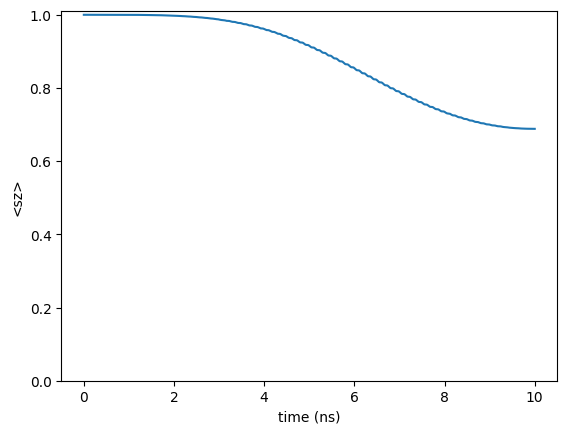

In [156]:
c_ops = [] ### No loss
psi0 = esys[1][1] ### Dressed Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,10,40001)
t_end = t_list[-1]
t_middle = t_end/2

drive_func = '(exp(-(t-t_middle)**2/(0.5*t_end)**2) - exp(-(0-t_middle)**2/(0.5*t_end)**2)) * cos(2*3.14159*freq*t) * 0.05'

H = [H_JC*2*np.pi, [sx*2*np.pi, drive_func]]
psi0 = esys[1][0]

options = q.Options(rtol=1e-10, atol=1e-10, nsteps = 1000000000, store_states = True, store_final_state = True)

start_time = time.time()
result = q.mesolve(H, psi0, t_list, c_ops = c_ops, e_ops = [psi0*psi0.dag()], options = options,
                   args = {'t_middle': t_middle, 't_end': t_end, 'freq':esys[0][1]-esys[0][0]})
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time, 's')
plt.plot(t_list, result.expect[0], '-')
plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(0,1.01)

## Method 3: interpolated function
Cubic interpolated functions used

Text(0.5, 0, 'time (ns)')

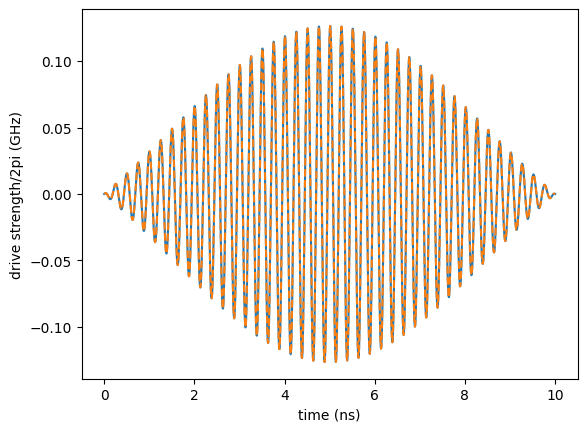

In [166]:
c_ops = [] ### No loss
psi0 = esys[1][1] ### Dressed Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,10,40001)
t_end = t_list[-1]
t_middle = t_end/2

drive_list = np.exp(-(t_list-t_middle)**2/(0.5*t_end)**2) 
drive_list = drive_list-np.amin(drive_list)
drive_list *= np.cos(2*np.pi*(esys[0][1]-esys[0][0])*t_list) * 0.2
drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)


plt.plot(t_list, drive_func(t_list))
drive_list_full = drive_list
plt.plot(t_list, drive_list, '--')
plt.ylabel('drive strength/2pi (GHz)')
plt.xlabel('time (ns)')

1.376941204071045 s


(0.0, 1.01)

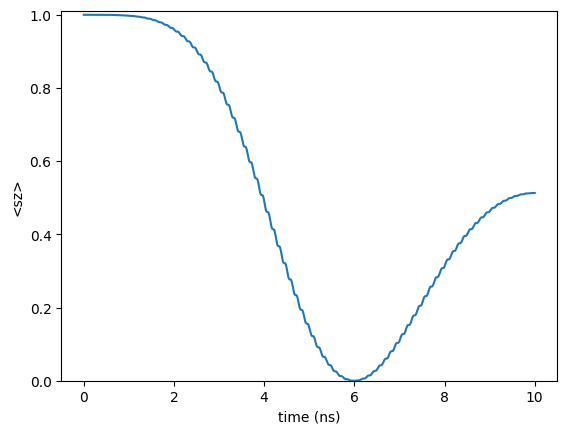

In [167]:
H = [H_JC*2*np.pi, [sx*2*np.pi, drive_func]]
psi0 = esys[1][0]

options = q.Options(rtol=1e-10, atol=1e-10, nsteps = 1000000000, store_states = True, store_final_state = True)
start_time = time.time()
result = q.mesolve(H, psi0, t_list, c_ops = c_ops, e_ops = [psi0*psi0.dag()], options = options,
                   args = {'t_middle': t_middle, 't_end': t_end, 'freq':esys[0][1]-esys[0][0]})
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time, 's')
plt.plot(t_list, result.expect[0], '-')
result_full = result
plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(0,1.01)

# Be smart: rotating-frame transformation and rotating-wave approximation (RWA)

## Hamiltonian in the rotating frame
Rabi-coupling model
$$\hat{H} = 0\cdot \hat{\sigma}_z/2 + (\omega_c-\omega_q) \cdot\hat{a}^\dagger \hat{a} + g(\hat{a} \hat{\sigma}^++ \hat{a}^\dagger\hat{\sigma}^-)$$
drive
$$\hat{H}_d(t) = \frac{\tilde{d}(t)}{2}\hat{\sigma}_x$$

In [168]:
## Tensor product
### Construct operators under tensor product
#### Identities
N_trunc = 10
I2 = q.qeye(2)
Ir = q.qeye(N_trunc)
#### qubit
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()
### cavity
a = q.destroy(N_trunc)
a = q.tensor(I2, a)


#### Hamiltonian construction
wc = 1 # cavity freq, in GHz
wq = 0 # qubit freq, in GHz
g = 0.1 # coupling strength

H_JC = wq * sz/2 + 0.001# 1/2 is important here
H_JC += wc * a.dag() * a + 0.001
H_JC += g * (a.dag()*sm + a * sp)

#esys = H_JC.eigenstates()

Text(0.5, 0, 'time (ns)')

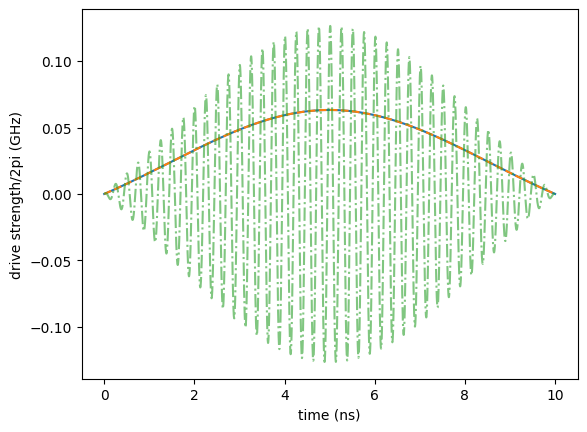

In [169]:
c_ops = [] ### No loss
psi0 = esys[1][1] ### Dressed Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,10,40001)
t_end = t_list[-1]
t_middle = t_end/2

drive_list = np.exp(-(t_list-t_middle)**2/(0.5*t_end)**2) 
drive_list = drive_list-np.amin(drive_list)
drive_list *=  0.05 / 2 * 4
drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)

plt.plot(t_list, drive_func(t_list))
plt.plot(t_list, drive_list, '--')
plt.plot(t_list, drive_list_full, '-.', alpha = 0.6)

plt.ylabel('drive strength/2pi (GHz)')
plt.xlabel('time (ns)')

1.0025711059570312 s


(0.0, 1.01)

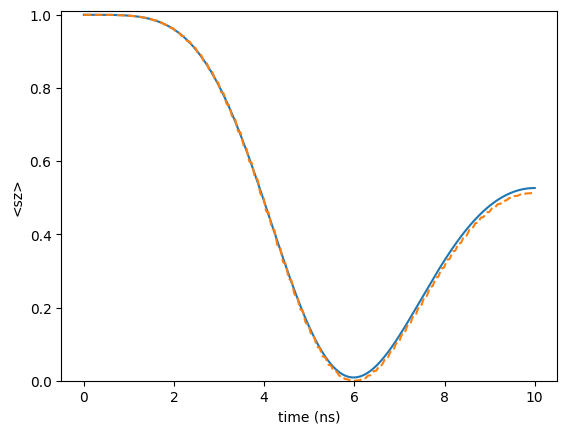

In [170]:
H = [H_JC*2*np.pi, [sx*2*np.pi, drive_func]]
psi0 = esys[1][0]

options = q.Options(rtol=1e-10, atol=1e-10, nsteps = 1000000000, store_states = True, store_final_state = True)
start_time = time.time()
result = q.mesolve(H, psi0, t_list, c_ops = c_ops, e_ops = [psi0*psi0.dag()], options = options)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time, 's')
plt.plot(t_list, result.expect[0], '-')
plt.plot(t_list, result_full.expect[0], '--')

plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(0,1.01)

# Steady-state solution

## Hamiltonian in the rotating frame
Rabi-coupling model
$$\hat{H} = (\omega_q-\omega_d)\cdot \hat{\sigma}_z/2 + (\omega_c-\omega_d) \cdot\hat{a}^\dagger \hat{a} + g(\hat{a} \hat{\sigma}^++ \hat{a}^\dagger\hat{\sigma}^-)$$
drive
$$\hat{H}_d(t) = \frac{\tilde{d}(t)}{2}\hat{\sigma}_x$$

In [178]:
## Tensor product
### Construct operators under tensor product
#### Identities
N_trunc = 10
I2 = q.qeye(2)
Ir = q.qeye(N_trunc)
#### qubit
sx = q.sigmax()
sx = q.tensor(sx, Ir)
sz = -q.sigmaz()
sz = q.tensor(sz, Ir)
sm = q.destroy(2)
sm = q.tensor(sm, Ir)
sp = sm.dag()
### cavity
a = q.destroy(N_trunc)
a = q.tensor(I2, a)


#### Hamiltonian construction
wd = 3.99
wc = 5 - wd # cavity freq, in GHz
wq = 4 - wd # qubit freq, in GHz
g = 0.1 # coupling strength

H_JC = wq * sz/2 + 0.001# 1/2 is important here
H_JC += wc * a.dag() * a + 0.001
H_JC += g * (a.dag()*sm + a * sp)

1.2136011123657227 s


(0.0, 1.01)

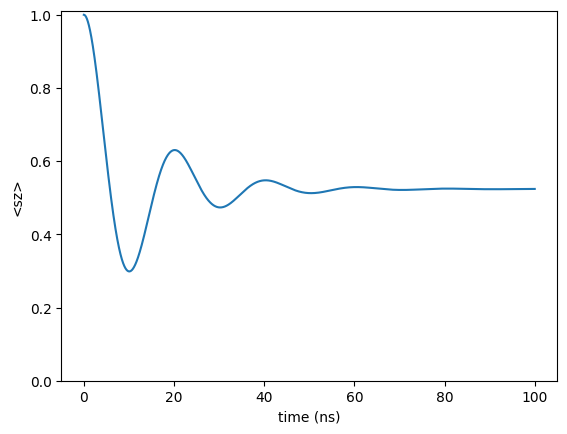

In [179]:
c_ops = [np.sqrt(1e-1)*sm] ### No loss
psi0 = esys[1][0] ### Dressed Excited state of qubit, Ground state of cavity

t_list = np.linspace(0,100,40001)
t_end = t_list[-1]
t_middle = t_end/2

drive_list =  0.05 / 2 * np.ones(len(t_list))
drive_func = q.interpolate.Cubic_Spline(t_list[0], t_list[-1], drive_list)

H = [H_JC*2*np.pi, [sx*2*np.pi, drive_func]]
psi0 = esys[1][0]

options = q.Options(rtol=1e-10, atol=1e-10, nsteps = 1000000000, store_states = True, store_final_state = True)
start_time = time.time()
result = q.mesolve(H, psi0, t_list, c_ops = c_ops, e_ops = [psi0*psi0.dag()], options = options)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time, 's')
plt.plot(t_list, result.expect[0], '-')

plt.xlabel('time (ns)')
plt.ylabel('<sz>')

plt.ylim(0,1.01)

In [192]:
def H_RWA(detuning, d):
    HRWA = detuning * sz/2 + 0.001# 1/2 is important here
    HRWA += (1+detuning) * a.dag() * a + 0.001
    HRWA += g * (a.dag()*sm + a * sp)
    HRWA += d/2 * sx
    return HRWA

def steady(detuning, d):
    c_ops = [np.sqrt(1e-3)*sm] ### No loss
    rho_ss = q.steadystate([H_RWA(detuning,d), [sx, drive_func]], c_ops)
    return rho_ss

q.expect(psi0*psi0.dag(), steady(0.01, 0.05))

TypeError: Solving for steady states requires Liouvillian (super) operators

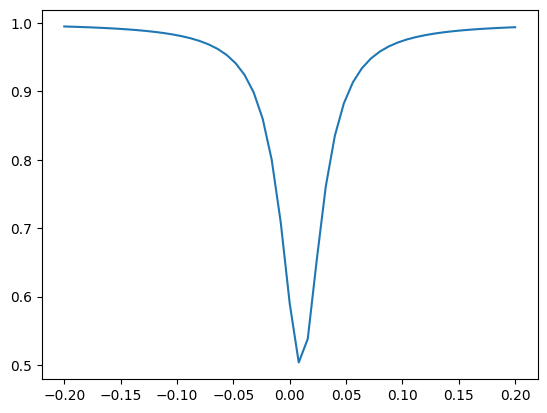

In [189]:
detuning_list = np.linspace(-0.2,0.2,51)
pop_list = np.zeros(len(detuning_list))
for dt_ in range(len(detuning_list)):
    pop_list[dt_] = q.expect(psi0*psi0.dag(), steady(detuning_list[dt_], 0.03))
plt.plot(detuning_list, pop_list)

Text(0, 0.5, 'detuning (GHz)')

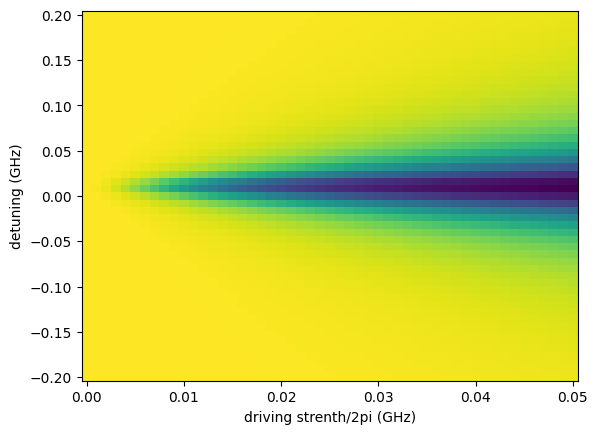

In [175]:
detuning_list = np.linspace(-0.2,0.2,51)
d_list = np.linspace(0, 0.05, 51)
pop_list = np.zeros((len(d_list), len(detuning_list)))
for dt_ in range(len(detuning_list)):
    for d_ in range(len(d_list)):
        pop_list[d_, dt_] = q.expect(psi0*psi0.dag(), steady(detuning_list[dt_], d_list[d_]))
plt.pcolormesh(d_list, detuning_list, pop_list.transpose())
plt.xlabel('driving strenth/2pi (GHz)')
plt.ylabel('detuning (GHz)')

In [176]:
def H_RWA_2(detuning, d):
    HRWA = detuning * sz/2 + 0.001
    HRWA += (detuning) * a.dag() * a + 0.001
    HRWA += 0.001 * (a.dag()*a)*sz
    HRWA += d/2 * sx
    HRWA += 0.002 * (a+a.dag())
    return HRWA

def steady_2(detuning, d):
    c_ops = [np.sqrt(1e-1)*sm] ### No loss
    rho_ss = q.steadystate(H_RWA_2(detuning, d) * 2*np.pi, c_ops)
    return rho_ss


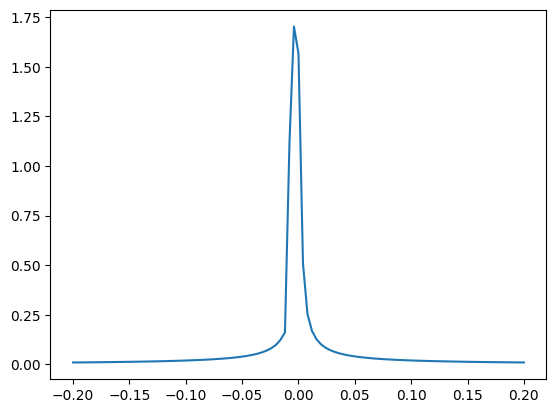

In [177]:
detuning_list = np.linspace(-0.2,0.2,101)
tran_list = np.zeros(len(detuning_list), dtype = complex)
for dt_ in range(len(detuning_list)):
    tran_list[dt_] = q.expect(a, steady_2(detuning_list[dt_], 0.05))
plt.plot(detuning_list, abs(tran_list))

In [151]:
#detuning_list = np.linspace(-0.2,0.2,51)
#d_list = np.linspace(0, 0.05, 51)
#pop_list = np.zeros((len(d_list), len(detuning_list)), dtype = complex)
#for dt_ in range(len(detuning_list)):
#    for d_ in range(len(d_list)):
#        pop_list[d_, dt_] = q.expect(a, steady_2(detuning_list[dt_], d_list[d_]))
#plt.pcolormesh(d_list, detuning_list, abs(pop_list.transpose()))
#plt.xlabel('driving strenth/2pi (GHz)')
#plt.ylabel('detuning (GHz)')